In [16]:
import torch
device = 'cuda' if torch.cuda.is_available else 'cpu'
from agent import Agent, advanced_random_policy, random_policy, sarsa
from game import Game
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Trains and test a single Agent

agent = Agent(size=3)
random_agent = Agent(size=3, policy=advanced_random_policy)
game = Game(agent, random_agent, n_dim=2, size=3)
sarsa(game, agent, random_policy, alpha=0.8, alpha_factor=0.999, gamma=0.9, epsilon=1.0, epsilon_factor=0.999, \
      r_win=5.0, r_lose=0.0, r_even=1.0, r_even2=1.5, num_episodes=10000)

  5%|▍         | 465/10000 [00:03<01:17, 123.04it/s]


KeyboardInterrupt: 

In [ ]:
win_p1, win_p2, tot_even = game.simulate_games(1000)
print('Agent won', win_p1, 'times, lost', win_p2, 'times and did', tot_even, 'even games')

In [ ]:
game.play_a_game()

In [83]:
# Evaluates agents performances based on number of episodes
episodes = [1, 10, 100, 500, 1000, 5000, 10000]
results_episodes = dict()
for eps in episodes:
    print(f"Testing with {eps} episodes")
    agent = Agent(size=3)
    random_agent = Agent(size=3, policy=random_policy)
    game = Game(agent, random_agent, n_dim=2, size=3)
    sarsa(game, agent, random_policy, alpha=0.45, alpha_factor=0.9995, gamma=0.7, epsilon=1.0, epsilon_factor=0.9997, \
          r_win=11, r_lose=0.0, r_even=1.0, r_even2=1.25, num_episodes=eps)
    results_episodes[eps] = game.simulate_games(10000)
    print(f"Current results are {results_episodes}")
results_episodes = pd.DataFrame(results_episodes).T
results_episodes.columns = ["win_agent_first", "lose_agent_first", "even_agent_first", "win_agent_second", "lose_agent_second", "even_agent_second"]

100%|██████████| 10000/10000 [01:07<00:00, 147.88it/s]


Testing with 1 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648)}
Testing with 10 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648), 10: (2952, 1401, 647, 1448, 2928, 624)}
Testing with 100 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648), 10: (2952, 1401, 647, 1448, 2928, 624), 100: (3115, 1273, 612, 1727, 2655, 618)}
Testing with 500 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648), 10: (2952, 1401, 647, 1448, 2928, 624), 100: (3115, 1273, 612, 1727, 2655, 618), 500: (4052, 468, 480, 2656, 1658, 686)}
Testing with 1000 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648), 10: (2952, 1401, 647, 1448, 2928, 624), 100: (3115, 1273, 612, 1727, 2655, 618), 500: (4052, 468, 480, 2656, 1658, 686), 1000: (4691, 200, 109, 2092, 789, 2119)}
Testing with 5000 episodes
Current results are {1: (2862, 1433, 705, 1446, 2906, 648), 10: (2952, 1401, 647, 1448, 2928, 624), 100: (3115, 1273, 612, 1727, 2655, 618), 

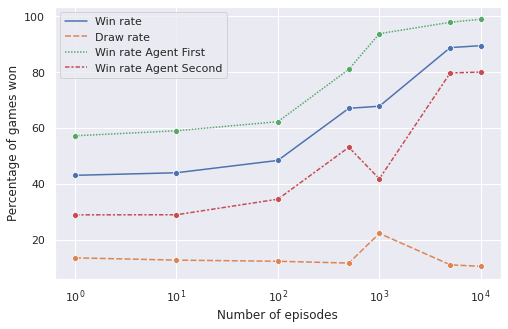

In [85]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,5)})
results_episodes["total_games"] = results_episodes["win_agent_first"] + results_episodes["win_agent_second"] + \
                                  results_episodes["lose_agent_first"] + results_episodes["lose_agent_second"] + \
                                  results_episodes["even_agent_first"] + results_episodes["even_agent_second"]
results_episodes["Win rate"] = ((results_episodes["win_agent_first"] + results_episodes["win_agent_second"]) / results_episodes["total_games"]) * 100
results_episodes["Draw rate"] = ((results_episodes["even_agent_first"] + results_episodes["even_agent_second"]) / results_episodes["total_games"]) * 100
results_episodes["Win rate Agent First"] = ((results_episodes["win_agent_first"]) / (results_episodes["win_agent_first"] + results_episodes["lose_agent_first"] + results_episodes["even_agent_first"])) * 100
results_episodes["Win rate Agent Second"] = ((results_episodes["win_agent_second"]) / (results_episodes["win_agent_second"] + results_episodes["lose_agent_second"] + results_episodes["even_agent_second"])) * 100

ax = sns.lineplot(data=results_episodes[["Win rate", "Draw rate", "Win rate Agent First", "Win rate Agent Second"]], marker="o")
ax.set(xlabel='Number of episodes', ylabel='Percentage of games won')
ax.set(xscale="log")
ax.legend(loc='upper left')
plt.savefig("Perf_vs_Episodes.png")
plt.show()

In [24]:
# Evaluates agents performances based on board size
board_sizes = [3, 4, 5, 6, 7]
results_boardsize = dict()
for board_size in board_sizes:
    print(f"Testing board of size {board_size}x{board_size}")
    agent = Agent(size=board_size)
    random_agent = Agent(size=board_size, policy=random_policy)
    game = Game(agent, random_agent, n_dim=2, size=board_size)
    # Early stopping ?
    sarsa(game, agent, random_policy, alpha=0.45, alpha_factor=0.9995, gamma=0.7, epsilon=1.0, epsilon_factor=0.9997, \
          r_win=11, r_lose=0.0, r_even=1.0, r_even2=1.25, num_episodes=10000)
    results_boardsize[agent.q_array.shape[0]] = game.simulate_games(10000)
    print(f"Current results are {results_boardsize}")

 63%|██████▎   | 6252/10000 [16:56<10:09,  6.15it/s]


Testing board of size 3x3
Current results are {625: (258, 0, 742)}
Testing board of size 4x4
Current results are {625: (258, 0, 742), 45287: (6, 594, 400)}
Testing board of size 5x5
Current results are {625: (258, 0, 742), 45287: (6, 594, 400), 97832: (0, 373, 627)}
Testing board of size 6x6


KeyboardInterrupt: 

In [ ]:
winrates = [(val[0] / (val[0] + val[1])) * 100 for key, val in results_boardsize.items()]
sizes = [key for key, val in results_boardsize.items()]
ax = sns.lineplot(x=sizes, y=winrates, marker="o")
ax.set(xlabel='Q table size', ylabel='Percentage of games won')
ax.set(xscale="log")
plt.savefig("Perf_vs_BoardSize.png")
plt.show()
